In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as tnn

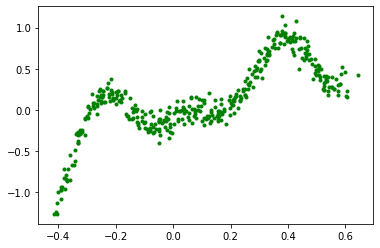

In [2]:
x = np.linspace(0,1,400)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
plt.scatter(x, y, marker='.', color='g')

In [3]:
def inrange(X, break0, break1): #if x is after
    xmsk1 = X >= break0
    xmsk2 = X < break1
    xmsk = np.bitwise_and(xmsk1, xmsk2)
    xs = xmsk #*X
    return xs

In [4]:
def linear_interpolation(X, break_x, break_y):
    x,y = break_x, break_y
    n = len(break_x)
    Y = np.zeros_like(X)
    for i in range(n-1):
        mask = inrange(X, break_x[i], break_x[i+1])
        Y_ = (y[i+1] - y[i])/(x[i+1] - x[i])*(X - x[i]) + y[i]
        Y = Y + Y_*mask
    return Y

In [5]:
def backward(X, dY, break_x, break_y):
    x,y = break_x, break_y
    n = len(break_x)
    Y = np.zeros((n, X.shape[0]))
    inranges = np.zeros((n-1, X.shape[0]))
    consts = np.zeros_like(inranges)
    
    for i in range(n-1):
        inranges[i] = inrange(X, break_x[i], break_x[i+1])
            
    for i in range(n-1):
        consts[i] = ((X-x[i])/(x[i+1] - x[i]))
    
    Y[0] = (-1* consts[0] +1)*inranges[0]
    Y[-1] = consts[-1]*inranges[-1]
    for i in range(1, n-1):
            a = consts[i-1]*inranges[i-1]
            b = (-1* consts[i] +1)*inranges[i]
            Y[i] = a+b
    Y = Y*dY
#     Y = Y.mean(axis=1)

    ny = np.zeros_like(parmy)
    ny_ = np.count_nonzero(inranges, axis=1)
    ny[:-1] += ny_
    ny[1:] += ny_
    ny[ny==0.]= -1.
#     print("ny",ny)
    Y = Y.sum(axis=1)/ny

    return Y

In [6]:
def backward2(X, dY, break_x, break_y):
    x,y = break_x, break_y
    n = len(x)
    XX = np.zeros((n, X.shape[0]))
    inranges = np.zeros((n-1, X.shape[0]))
    consts = np.zeros_like(inranges)
    
    for i in range(n-1):
        inranges[i] = inrange(X, x[i], x[i+1])
            
    for i in range(n-1):
        consts[i] = ((y[i+1]-y[i])/(x[i+1] - x[i])**2)
    
    XX[0] = consts[0]*(X - x[1])*inranges[0]
    XX[-1] = -1*consts[-1]*(X - x[-2])*inranges[-1]
    for i in range(1, n-1):
            a = -1*consts[i-1]*(X - x[i-1])*inranges[i-1]
            b = consts[i]*(X - x[i+1])*inranges[i]
            XX[i] = a+b
    XX = XX*dY
#     XX = XX.mean(axis=1)

    nx = np.zeros_like(parmx)
    nx_ = np.count_nonzero(inranges, axis=1)
    nx[:-1] += nx_
    nx[1:] += nx_
    nx[nx==0.] = -1.
#     print('nx',nx)
    XX = XX.sum(axis=1)/nx
    return XX

In [7]:
def backward3(X, dY, break_x, break_y):
    x,y = break_x, break_y
    n = len(break_x)
    Y = np.zeros_like(X)
    
    for i in range(n-1):
        Y = Y + (y[i+1] - y[i])/(x[i+1] - x[i])*inrange(X, break_x[i], break_x[i+1])
    
    Y = Y*dY
    return Y

In [8]:
def error_piecewise(X, dY, break_x, break_y):
    x,y = break_x, break_y
    n = len(x)
    XX = np.zeros((n, X.shape[0]))
    dYs = np.zeros((n-1, X.shape[0]))
    for i in range(n-1):
        dYs[i] = dY*inrange(X, x[i], x[i+1])
    dYerr = (dYs**2).mean(axis=1)
    return dYerr

In [9]:
n_breaks = 15

parmx = list(np.sort(np.random.uniform(x.min(), x.max(), size=(n_breaks-2))))
parmx = np.array([x.min()-0.1]+parmx+[x.max()+0.1])
parmy = np.sort(np.random.uniform(y.min(), y.max(), size=(n_breaks)))
print(parmx)
print(parmy)

[-0.50935113 -0.37652752 -0.21143858 -0.15043928 -0.12992483 -0.07376023
 -0.03747569  0.20812996  0.31138256  0.46100192  0.47870198  0.53108894
  0.55821629  0.60843491  0.732779  ]
[-1.20099992 -1.18202668 -1.12558451 -1.04113354 -1.00912567 -0.61680527
 -0.46998498  0.00833275  0.18835255  0.21671978  0.22809854  0.68260401
  0.79692659  0.94352759  0.9877862 ]


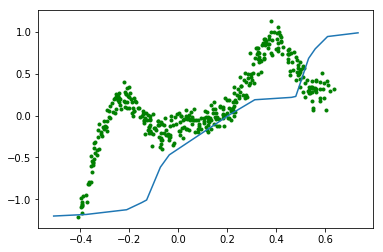

In [10]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.plot(parmx, parmy)

cleaning at step: 0
_______________________
Steps 0
Error 0.42979321911679946
parmx (7,)


_______________________
Steps 10
Error 0.08755712051654392
parmx (7,)


_______________________
Steps 20
Error 0.07493506499468557
parmx (7,)


_______________________
Steps 30
Error 0.07083605595972514
parmx (7,)


_______________________
Steps 40
Error 0.07959147213013196
parmx (7,)


_______________________
Steps 50
Error 0.1114607285771082
parmx (7,)


_______________________
Steps 60
Error 0.06786060971248725
parmx (7,)


_______________________
Steps 70
Error 0.06679704339018079
parmx (7,)


_______________________
Steps 80
Error 0.06848734565080225
parmx (7,)


_______________________
Steps 90
Error 0.07056503243055054
parmx (7,)


cleaning at step: 100
_______________________
Steps 100
Error 0.06329224444542826
parmx (7,)


_______________________
Steps 110
Error 0.052810447037749536
parmx (7,)


_______________________
Steps 120
Error 0.05248153732100831
parmx (7,)


____________________



cleaning at step: 1100
_______________________
Steps 1100
Error 0.019355768116054793
parmx (13,)


_______________________
Steps 1110
Error 0.04907990642518365
parmx (13,)


_______________________
Steps 1120
Error 0.03810790858443811
parmx (13,)


_______________________
Steps 1130
Error 0.02314924872367018
parmx (13,)


_______________________
Steps 1140
Error 0.02086299292931753
parmx (13,)


_______________________
Steps 1150
Error 0.016724254742002898
parmx (13,)


_______________________
Steps 1160
Error 0.027325951920905
parmx (13,)


_______________________
Steps 1170
Error 0.023622664131117344
parmx (13,)


_______________________
Steps 1180
Error 0.02370876983415547
parmx (13,)


_______________________
Steps 1190
Error 0.02464970473369524
parmx (13,)


cleaning at step: 1200
_______________________
Steps 1200
Error 0.02128661386585666
parmx (11,)


_______________________
Steps 1210
Error 0.03420698431017564
parmx (11,)


_______________________
Steps 1220
Error 0.02885037



_______________________
Steps 2170
Error 0.01512563356041826
parmx (13,)


_______________________
Steps 2180
Error 0.015555176036134922
parmx (13,)


_______________________
Steps 2190
Error 0.015340706780303583
parmx (13,)


cleaning at step: 2200
_______________________
Steps 2200
Error 0.015447677007616673
parmx (13,)


_______________________
Steps 2210
Error 0.030668781181269037
parmx (13,)


_______________________
Steps 2220
Error 0.015122685931359287
parmx (13,)


_______________________
Steps 2230
Error 0.015433626818948025
parmx (13,)


_______________________
Steps 2240
Error 0.015466807042584301
parmx (13,)


_______________________
Steps 2250
Error 0.015558694393935472
parmx (13,)


_______________________
Steps 2260
Error 0.01558693530495183
parmx (13,)


_______________________
Steps 2270
Error 0.015635744412554643
parmx (13,)


_______________________
Steps 2280
Error 0.015629155109173475
parmx (13,)


_______________________
Steps 2290
Error 0.015692203599754734
par



_______________________
Steps 3220
Error 0.016793993155290676
parmx (13,)


_______________________
Steps 3230
Error 0.016789443202493634
parmx (13,)


_______________________
Steps 3240
Error 0.016931274354572957
parmx (13,)


_______________________
Steps 3250
Error 0.017045690139118167
parmx (13,)


_______________________
Steps 3260
Error 0.01714485698349905
parmx (13,)


_______________________
Steps 3270
Error 0.01723517705911789
parmx (13,)


_______________________
Steps 3280
Error 0.01731298287559055
parmx (13,)


_______________________
Steps 3290
Error 0.017380342210830086
parmx (13,)


cleaning at step: 3300
_______________________
Steps 3300
Error 0.017438212226717244
parmx (13,)


_______________________
Steps 3310
Error 0.011202986382892704
parmx (13,)


_______________________
Steps 3320
Error 0.016555351281417174
parmx (13,)


_______________________
Steps 3330
Error 0.017810320805923322
parmx (13,)


_______________________
Steps 3340
Error 0.0181384830981739
parmx 



_______________________
Steps 4280
Error 0.019193535323198774
parmx (15,)


_______________________
Steps 4290
Error 0.02842277011002575
parmx (15,)


cleaning at step: 4300
_______________________
Steps 4300
Error 0.01894463126978559
parmx (13,)


_______________________
Steps 4310
Error 0.0232975329680079
parmx (13,)


_______________________
Steps 4320
Error 0.019422530743787733
parmx (13,)


_______________________
Steps 4330
Error 0.018347534721567985
parmx (13,)


_______________________
Steps 4340
Error 0.016903988530699323
parmx (13,)


_______________________
Steps 4350
Error 0.01760624721295001
parmx (13,)


_______________________
Steps 4360
Error 0.016640835577396797
parmx (13,)


_______________________
Steps 4370
Error 0.017371393106704675
parmx (13,)


_______________________
Steps 4380
Error 0.01836454727260553
parmx (13,)


_______________________
Steps 4390
Error 0.0180310180553905
parmx (13,)


cleaning at step: 4400
_______________________
Steps 4400
Error 0.01816



_______________________
Steps 5340
Error 0.017588751791972956
parmx (15,)


_______________________
Steps 5350
Error 0.01759104713344465
parmx (15,)


_______________________
Steps 5360
Error 0.017592923708727667
parmx (15,)


_______________________
Steps 5370
Error 0.017595496312926513
parmx (15,)


_______________________
Steps 5380
Error 0.017597637304518274
parmx (15,)


_______________________
Steps 5390
Error 0.01808633884391231
parmx (15,)


cleaning at step: 5400
_______________________
Steps 5400
Error 0.017885527211364563
parmx (15,)


_______________________
Steps 5410
Error 0.017883275023216228
parmx (15,)


_______________________
Steps 5420
Error 0.017886612918205397
parmx (15,)


_______________________
Steps 5430
Error 0.017881385344591102
parmx (15,)


_______________________
Steps 5440
Error 0.017877036747858743
parmx (15,)


_______________________
Steps 5450
Error 0.01787475534780392
parmx (15,)


_______________________
Steps 5460
Error 0.017874243240903545
parm



cleaning at step: 6400
_______________________
Steps 6400
Error 0.018655299874417844
parmx (15,)


_______________________
Steps 6410
Error 0.018659903448615588
parmx (15,)


_______________________
Steps 6420
Error 0.018664500839401788
parmx (15,)


_______________________
Steps 6430
Error 0.01866773037247807
parmx (15,)


_______________________
Steps 6440
Error 0.018671761206283926
parmx (15,)


_______________________
Steps 6450
Error 0.01867611141907433
parmx (15,)


_______________________
Steps 6460
Error 0.018680394745615846
parmx (15,)


_______________________
Steps 6470
Error 0.018683831639679873
parmx (15,)


_______________________
Steps 6480
Error 0.018687705302400038
parmx (15,)


_______________________
Steps 6490
Error 0.018691208414464703
parmx (15,)


cleaning at step: 6500
_______________________
Steps 6500
Error 0.018695322989715154
parmx (15,)


_______________________
Steps 6510
Error 0.018699630796169847
parmx (15,)


_______________________
Steps 6520
Error 0



_______________________
Steps 7450
Error 0.01968854187052963
parmx (15,)


_______________________
Steps 7460
Error 0.0197247351350285
parmx (15,)


_______________________
Steps 7470
Error 0.019763022549746597
parmx (15,)


_______________________
Steps 7480
Error 0.019801684682307842
parmx (15,)


_______________________
Steps 7490
Error 0.019837902018694835
parmx (15,)


cleaning at step: 7500
_______________________
Steps 7500
Error 0.019870673427996487
parmx (15,)


_______________________
Steps 7510
Error 0.019899427582054145
parmx (15,)


_______________________
Steps 7520
Error 0.019922524750731502
parmx (15,)


_______________________
Steps 7530
Error 0.01994007446710155
parmx (15,)


_______________________
Steps 7540
Error 0.019952945515601356
parmx (15,)


_______________________
Steps 7550
Error 0.019959951857691362
parmx (15,)


_______________________
Steps 7560
Error 0.019962902990989666
parmx (15,)


_______________________
Steps 7570
Error 0.019961138824831585
parmx



_______________________
Steps 8530
Error 0.020033498003019012
parmx (15,)


_______________________
Steps 8540
Error 0.020032595546413696
parmx (15,)


_______________________
Steps 8550
Error 0.02003155283629353
parmx (15,)


_______________________
Steps 8560
Error 0.020031599219181184
parmx (15,)


_______________________
Steps 8570
Error 0.020030997895389695
parmx (15,)


_______________________
Steps 8580
Error 0.020032617257407428
parmx (15,)


_______________________
Steps 8590
Error 0.020034022824592018
parmx (15,)


cleaning at step: 8600
_______________________
Steps 8600
Error 0.020036533923725938
parmx (15,)


_______________________
Steps 8610
Error 0.020039246478253857
parmx (15,)


_______________________
Steps 8620
Error 0.020041566095402582
parmx (15,)


_______________________
Steps 8630
Error 0.020043876980738524
parmx (15,)


_______________________
Steps 8640
Error 0.020045484764948635
parmx (15,)


_______________________
Steps 8650
Error 0.020046378649905872
pa

cleaning at step: 9600
_______________________
Steps 9600
Error 0.020248656931428303
parmx (15,)


_______________________
Steps 9610
Error 0.02026519045874447
parmx (15,)


_______________________
Steps 9620
Error 0.020261663073608247
parmx (15,)


_______________________
Steps 9630
Error 0.020236099024892793
parmx (15,)


_______________________
Steps 9640
Error 0.020189215882585945
parmx (15,)


_______________________
Steps 9650
Error 0.020126015093644884
parmx (15,)


_______________________
Steps 9660
Error 0.020053770304332114
parmx (15,)


_______________________
Steps 9670
Error 0.019980821950462913
parmx (15,)


_______________________
Steps 9680
Error 0.01991805515781891
parmx (15,)


_______________________
Steps 9690
Error 0.01987385809633851
parmx (15,)


cleaning at step: 9700
_______________________
Steps 9700
Error 0.01985549646118594
parmx (15,)


_______________________
Steps 9710
Error 0.019867947948355166
parmx (15,)


_______________________
Steps 9720
Error 0.019

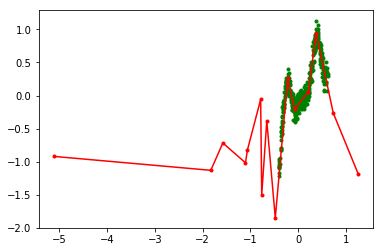

In [11]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

lr=0.1
for step in range(10000):
    Y = linear_interpolation(x, parmx, parmy)
    dy = Y-y
    dparmy = backward(x, dy, parmx, parmy)
    
    dparmx = backward2(x, dy, parmx, parmy)
    dx = backward3(x, dy, parmx, parmy)

    dparmx[0] = 0. if parmx[0]<x.min()-0.1 else parmx[0] - x.min() +0.1
    dparmx[-1] = 0. if parmx[-1]>x.max()+0.1 else parmx[-1] - x.max() -0.1

    parmy = parmy - dparmy * lr # update
    parmx = parmx - dparmx * lr
    
    # sorting the points for everything :D
    sortindx = np.argsort(parmx)
    parmx = parmx[sortindx]
    parmy = parmy[sortindx]
    
    if step % 100 == 0:
        print('cleaning at step:', step)
        
        # postprocessing the splines
        # removing ones which are very close to each other
        parmx_diff = np.ones_like(parmx)
        parmx_diff[1:] = np.diff(parmx)
        clipmask = np.abs(parmx_diff) > 1e-2
        parmx = parmx[clipmask]
        parmy = parmy[clipmask]
        
        # removing the ones which are on same line
        triangle = np.ones_like(parmx)
        for i in range(len(parmx)-2):
            triangle[i+1] = 0.5*np.abs(
                (parmx[i] - parmx[i+2])*(parmy[i+1] - parmy[i])-
                (parmx[i] - parmx[i+1])*(parmy[i+2] - parmy[i]))
        mergemask = triangle > 1e-2
        parmx = parmx[mergemask]
        parmy = parmy[mergemask]
        
        # adding units where the 
#         for _ in range(len(parmx), n_breaks):
        if len(parmx)< n_breaks:
            Y = linear_interpolation(x, parmx, parmy)
            dyerr = error_piecewise(x, Y-y, parmx, parmy)
            index = np.argmax(dyerr)
            newpx = (parmx[index] + parmx[index+1])/2.
            newpy = (parmy[index] + parmy[index+1])/2.
            # adding new interpolation points
            parmx = np.append(parmx, newpx)
            parmy = np.append(parmy, newpy)
            # sorting the points for plotting
            sortindx = np.argsort(parmx)
            parmx = parmx[sortindx]
            parmy = parmy[sortindx]
        
#         #removing if points contain no input
#         nx = np.zeros_like(parmx)
#         inranges = np.zeros((len(parmx)-1, x.shape[0]))
#         for i in range(len(inranges)):
#             inranges[i] = inrange(x, parmx[i], parmx[i+1])
#         nx_ = np.count_nonzero(inranges, axis=1)
#         nx[:-1] += nx_
#         nx[1:] += nx_
#         nx0mask = nx!=0
#         parmx = parmx[nx0mask]
#         parmy = parmy[nx0mask]

        
        
    if step % 10 == 0:
            
        error = (dy**2).mean()
        
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        print("parmx", parmx.shape)
        
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
        plt.plot(parmx, parmy, marker='.', color='r')
#         plt.scatter(x, dx, marker='.', color='c')
        

        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

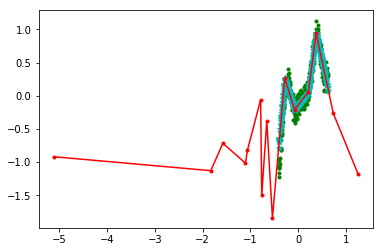

In [12]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.plot(parmx, parmy, marker='.', color='r')
Y = linear_interpolation(x, parmx, parmy)
plt.scatter(x, Y, marker='*', color='c')

In [13]:
# # adding new interpolation points
# parmx = np.append(parmx, 0.53)
# parmy = np.append(parmy, 0.0)
# # sorting the points for plotting
# sortindx = np.argsort(parmx)
# parmx = parmx[sortindx]
# parmy = parmy[sortindx]